<a href="https://colab.research.google.com/github/SOURISHKUNDU/machine_learning/blob/main/EM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt
colors=['royalblue','red','deeppink','maroon','mediumorchid','tan','forestgreen','olive','goldenrod','lightcyan','navy']
vectorizer=np.vectorize(lambda x:colors[x % len(colors)])

Creating Sample Data

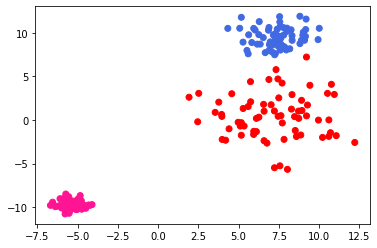

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=200,random_state=8,cluster_std=[1.0,2.5,0.5])
plt.scatter(X[:,0],X[:,1],c=vectorizer(y))

In [7]:
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=100,init_params='random')
gmm.fit(X)
yclust=gmm.predict(X)

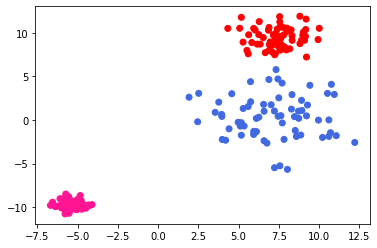

In [8]:
plt.scatter(X[:,0],X[:,1],c=vectorizer(yclust))

In [13]:
from sklearn import metrics
def purity_score(y_true,y_pred):
  contingency_matrix=metrics.cluster.contingency_matrix(y_true,y_pred)
  return np.sum(np.amax(contingency_matrix,axis=0))/np.sum(contingency_matrix)
  


In [16]:
from sklearn import datasets
import numpy as np
myiris=datasets.load_iris()
x=myiris.data
y=myiris.target
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
lab=list()
pure=list()
gmm=mixture.GaussianMixture(n_components=3,covariance_type='tied',max_iter=10,init_params='random')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Random 10 tied')
pure.append(purity_score(y,yclust))
gmm=mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=100,init_params='random')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Random 100 full')
pure.append(purity_score(y,yclust))
gmm=mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=100,init_params='kmeans')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Init kmeans 100 full')
pure.append(purity_score(y,yclust))


In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='random',max_iter=300,n_init=10,random_state=0)
yclust=kmeans.fit_predict(x)
lab.append('kmeans')
pure.append(purity_score(y,yclust))

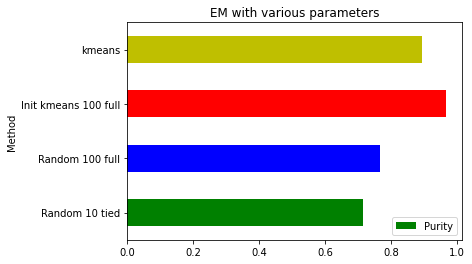

In [19]:
d={'Method':lab,'Purity':pure}
import pandas as pd
df=pd.DataFrame(d)
df.plot.barh(x='Method',y='Purity',title='EM with various parameters',color=tuple(['g','b','r','y','k']))


In [20]:
print(df)

                 Method    Purity
0        Random 10 tied  0.713333
1       Random 100 full  0.766667
2  Init kmeans 100 full  0.966667
3                kmeans  0.893333


INIT kmeans 100 full has highest purity

Text(0.5, 0, 'n_components')

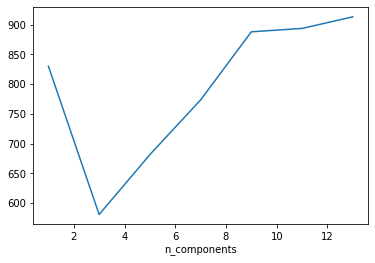

In [21]:
n_components = np.arange(1, 15,2)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x)
          for n in n_components]
plt.plot(n_components, [m.bic(x) for m in models], label='BIC')
plt.xlabel('n_components')